In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [4]:
# import csv file
df = pd.read_excel("cosmetic_dataset.xlsx")

In [5]:
df.shape

(10322, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10322 entries, 0 to 10321
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  10322 non-null  object 
 1   website       10322 non-null  object 
 2   country       10322 non-null  object 
 3   category      10322 non-null  object 
 4   subcategory   10322 non-null  object 
 5   price         10322 non-null  float64
 6   brand         10322 non-null  object 
 7   form          10322 non-null  object 
 8   color         10322 non-null  object 
 9   rating        8504 non-null   float64
dtypes: float64(2), object(8)
memory usage: 806.5+ KB


In [7]:
df.isnull().sum()

,0
product_name,0
website,0
country,0
category,0
subcategory,0
price,0
brand,0
form,0
color,0
rating,1818


In [8]:
df1=df.dropna()

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8504 entries, 0 to 10321
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  8504 non-null   object 
 1   website       8504 non-null   object 
 2   country       8504 non-null   object 
 3   category      8504 non-null   object 
 4   subcategory   8504 non-null   object 
 5   price         8504 non-null   float64
 6   brand         8504 non-null   object 
 7   form          8504 non-null   object 
 8   color         8504 non-null   object 
 9   rating        8504 non-null   float64
dtypes: float64(2), object(8)
memory usage: 730.8+ KB


### Distribution of Product Prices

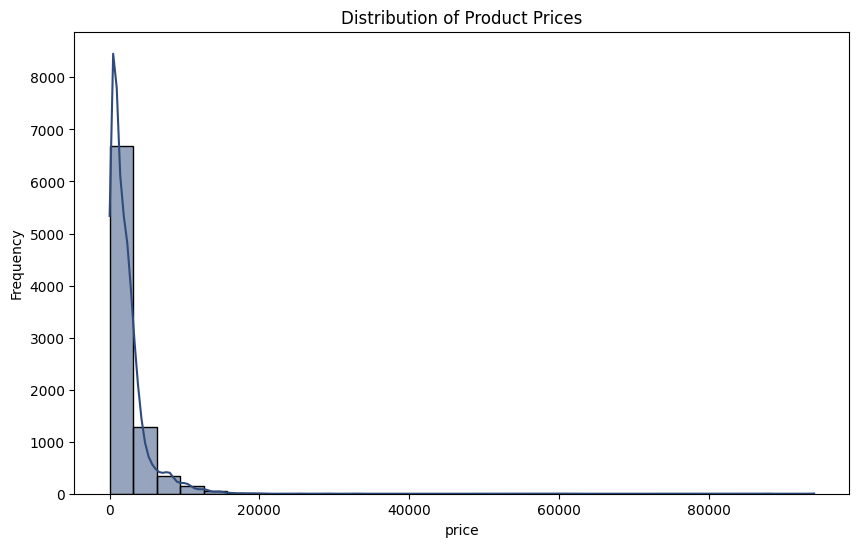

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df1['price'], bins=30, kde=True, color='#2f4b7c')
plt.title('Distribution of Product Prices')
plt.xlabel('price')
plt.ylabel('Frequency')
plt.show()

### Distribution of Product Category
- 제품 카테고리별 빈도 분포
  - lips와 eyes 카테고리가 가장 높은 비중을 차지하고 있음
  - 반면 hair와 face 카테고리는 상대적으로 빈도가 낮음

- 전체적으로 데이터셋은 색조 중심으로 편향된 분포를 보이고 있음

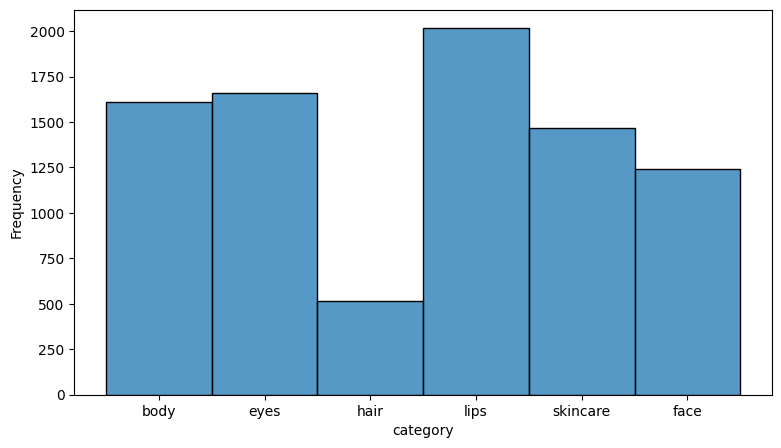

In [11]:
plt.figure(figsize=(9,5))
sns.histplot(df1['category'])
plt.xlabel('category')
plt.ylabel('Frequency')
plt.show()

### Calculate the average rating for each product category

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

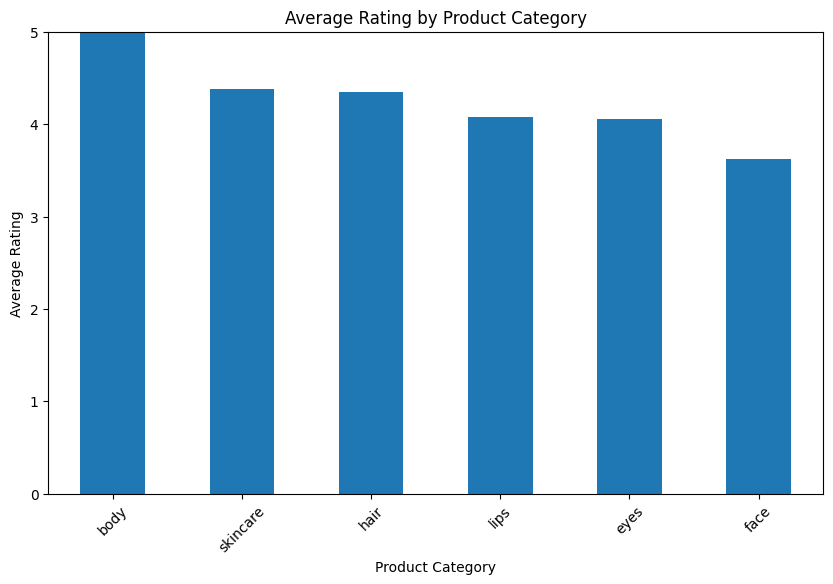

In [12]:
category_avg_ratings = df1.groupby('category')['rating'].mean().sort_values(ascending=False)

# Convert the Series to a DataFrame for Seaborn
category_avg_ratings_df = category_avg_ratings.reset_index()
plt.figure(figsize=(10, 6))
category_avg_ratings.plot(kind='bar')
plt.title('Average Rating by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.ylim(0, 5)
plt

### Calculate the average rating for each product sub-category

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

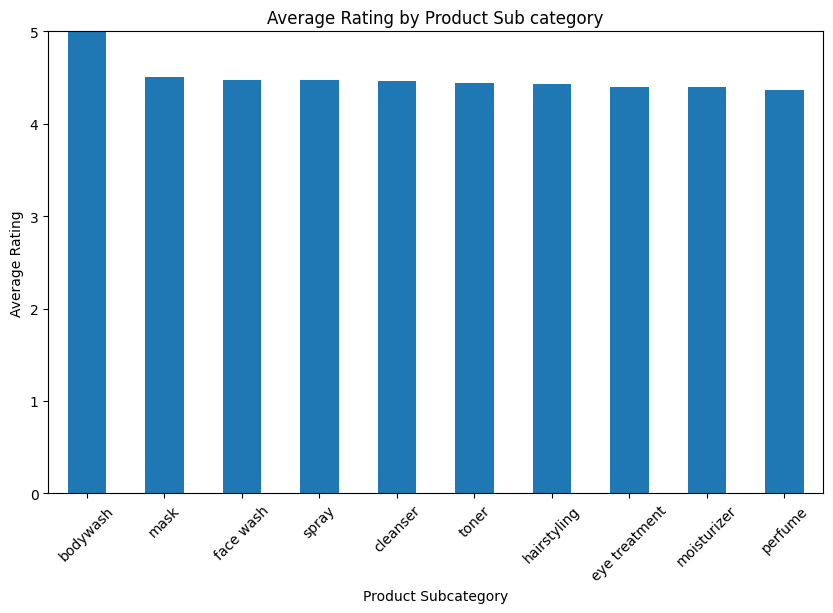

In [13]:
productcategory_avg_ratings = df1.groupby('subcategory')['rating'].mean().sort_values(ascending=False).head(10)

productcategory_avg_ratings_df = productcategory_avg_ratings.reset_index()
plt.figure(figsize=(10, 6))
productcategory_avg_ratings.plot(kind='bar')
plt.title('Average Rating by Product Sub category')
plt.xlabel('Product Subcategory')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.ylim(0, 5)
plt

### Top Brands by Product Count

/tmp/ipython-input-539149230.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.index, y=top_brands.values,palette="magma")


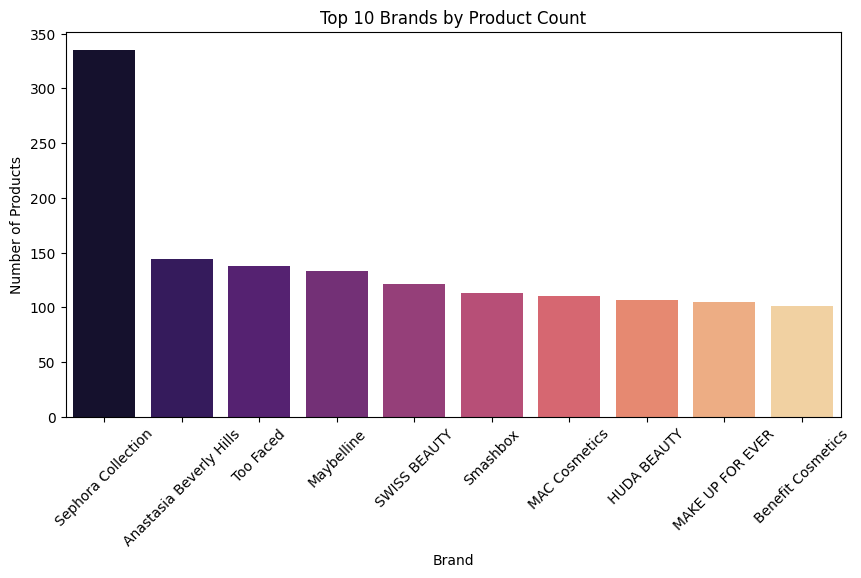

In [14]:

top_brands = df1['brand'].value_counts().nlargest(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_brands.index, y=top_brands.values,palette="magma")
plt.title('Top 10 Brands by Product Count')
plt.ylabel('Number of Products')
plt.xlabel('Brand')
plt.xticks(rotation=45)
plt.show()

### Calculate the distribution of product forms

/tmp/ipython-input-371711089.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=form_distribution.index, y=form_distribution.values, palette="Set2")


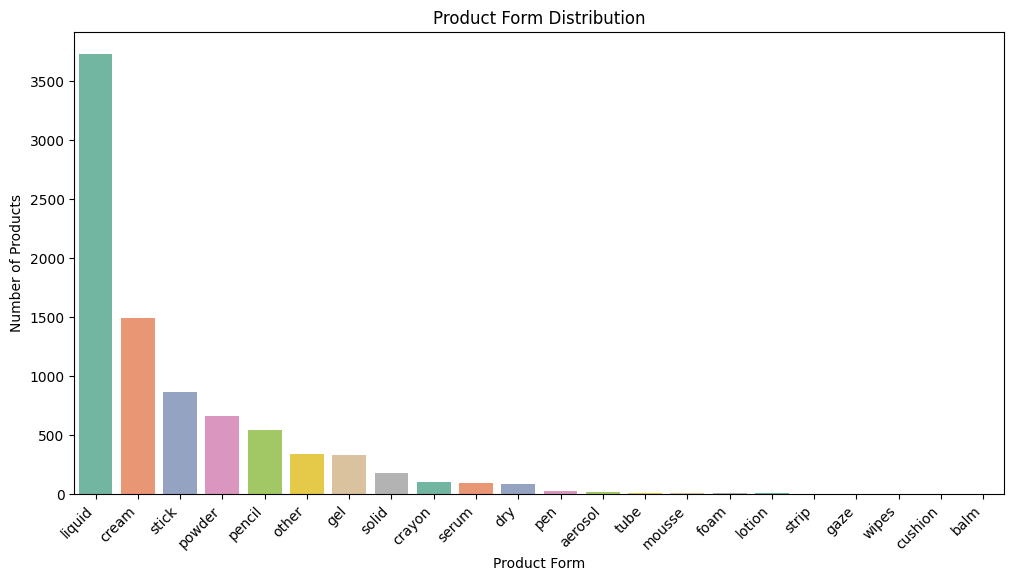

In [15]:
form_distribution = df1['form'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=form_distribution.index, y=form_distribution.values, palette="Set2")
plt.title('Product Form Distribution')
plt.xlabel('Product Form')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')
plt.show()


### Top Colors by Product Count

/tmp/ipython-input-961943583.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_colors.index, y=top_colors.values ,palette="viridis")


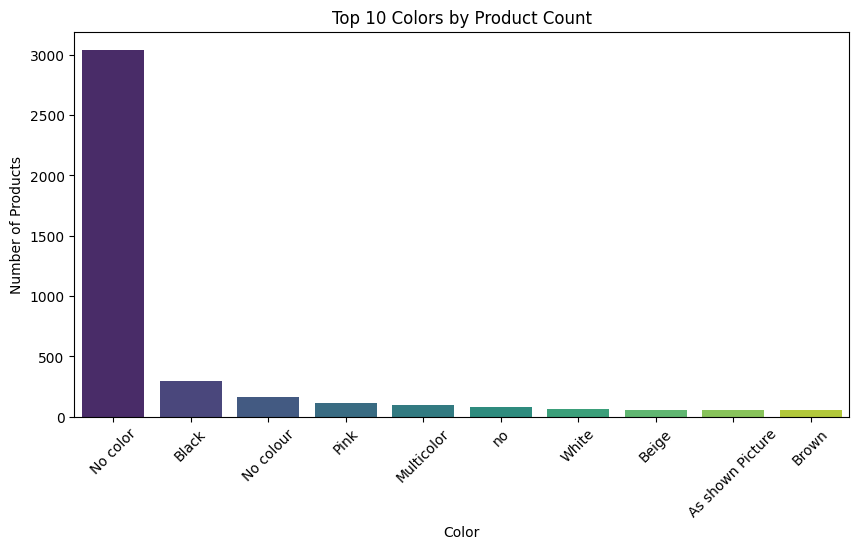

In [16]:
top_colors = df1['color'].value_counts().nlargest(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_colors.index, y=top_colors.values ,palette="viridis")
plt.title('Top 10 Colors by Product Count')
plt.ylabel('Number of Products')
plt.xlabel('Color')
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-3799620359.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='price', y='rating', data=df, palette="viridis")


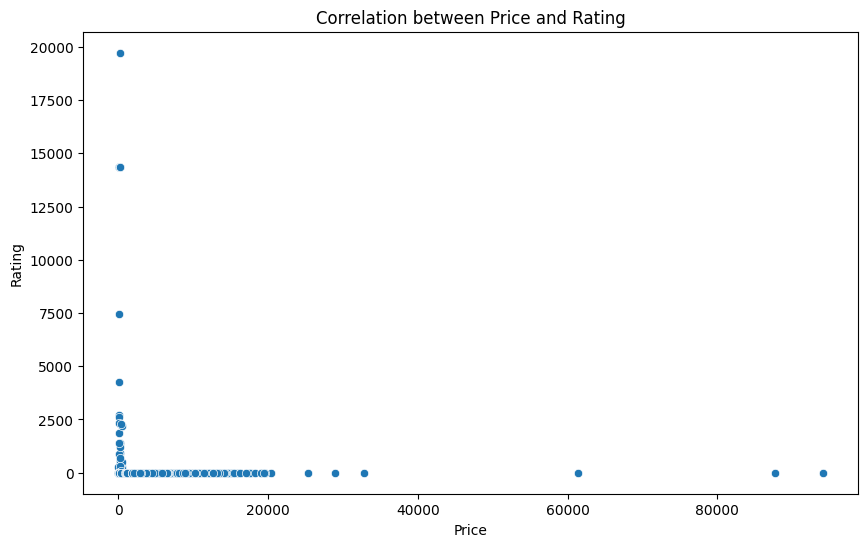

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='rating', data=df, palette="viridis")
plt.title('Correlation between Price and Rating')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()


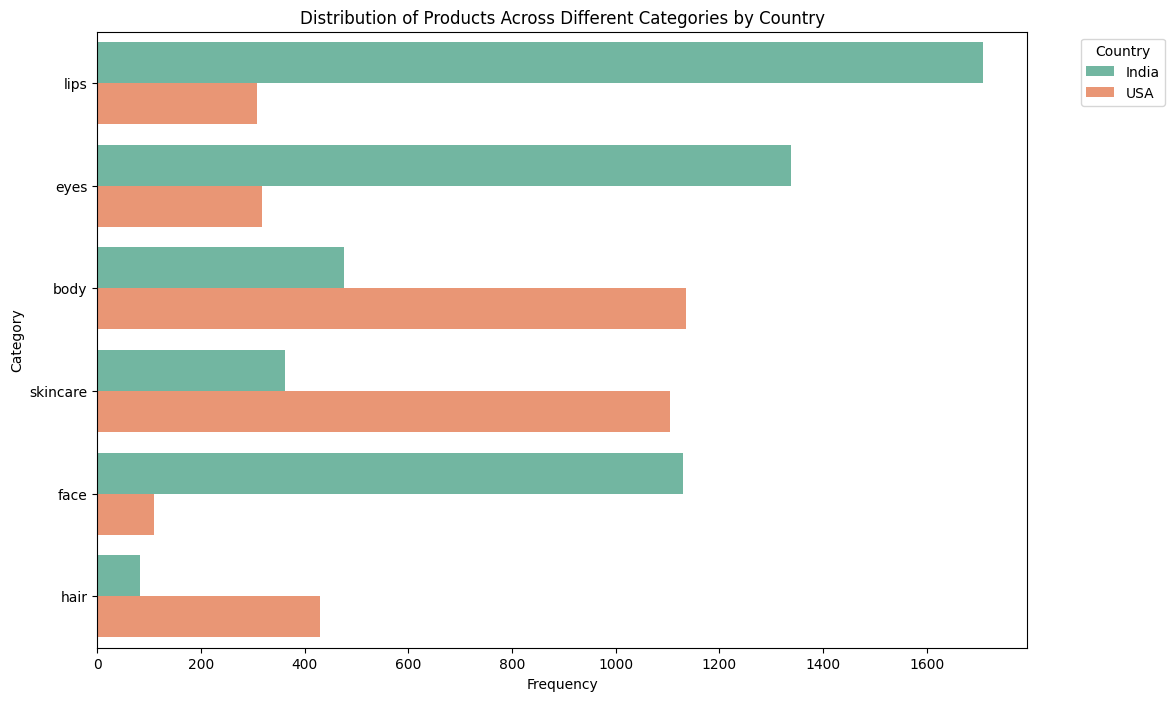

In [18]:
plt.figure(figsize=(12, 8))
sns.countplot(y='category', hue='country', data=df1,
              order=df1['category'].value_counts().index, palette="Set2")
plt.title('Distribution of Products Across Different Categories by Country')
plt.xlabel('Frequency')
plt.ylabel('Category')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

/tmp/ipython-input-1413309287.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='country', data=df1, palette='Spectral', order=df1['country'].value_counts().index)


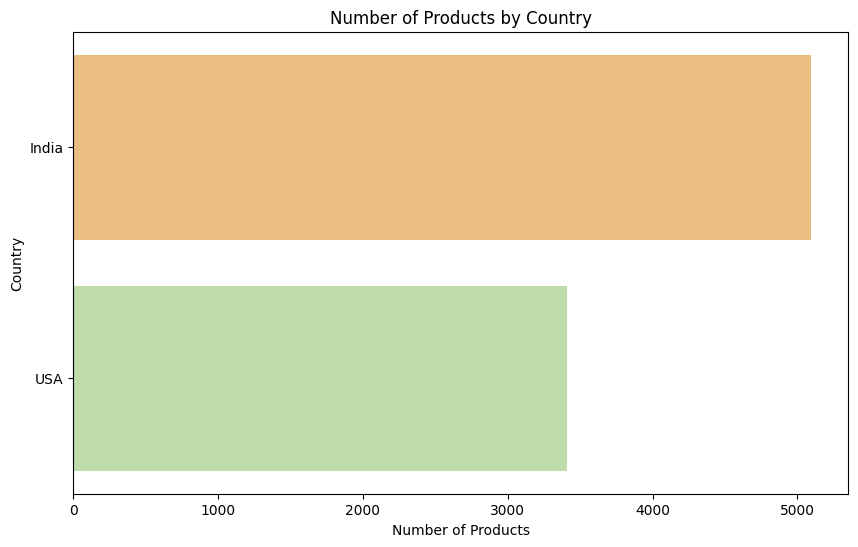

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(y='country', data=df1, palette='Spectral', order=df1['country'].value_counts().index)
plt.title('Number of Products by Country')
plt.xlabel('Number of Products')
plt.ylabel('Country')
plt.show()


### Find the top 5 product category by total sales amount

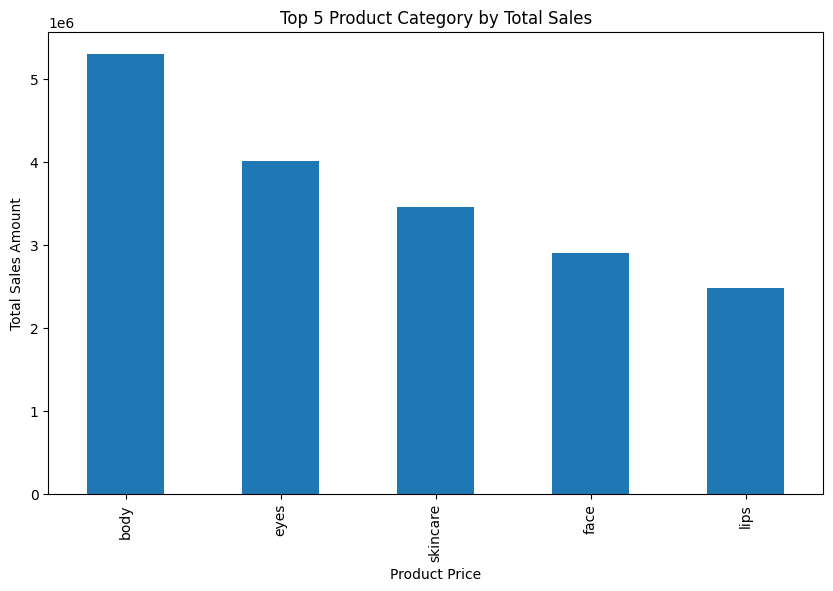

In [20]:

top_product_types = df1.groupby('category')['price'].sum().sort_values(ascending=False).head(5)
# Plotting the top 5 product types
plt.figure(figsize=(10, 6))
top_product_types.plot(kind='bar')
plt.title('Top 5 Product Category by Total Sales')
plt.xlabel('Product Price')
plt.ylabel('Total Sales Amount')

plt.show()



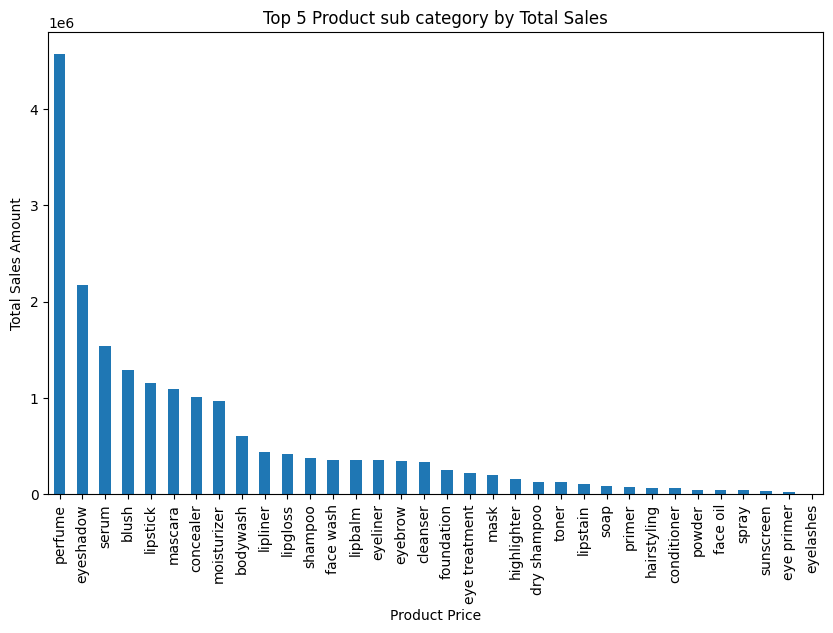

In [21]:
top_product_types = df1.groupby('subcategory')['price'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
top_product_types.plot(kind='bar')
plt.title('Top 5 Product sub category by Total Sales')
plt.xlabel('Product Price')
plt.ylabel('Total Sales Amount')

plt.show()


### Total sales

In [ ]:
Total_Sales=df1["price"].sum()
print(Total_Sales)

18821758.03


In [ ]:
sales_category= df1.groupby('category')['price'].sum().sort_values(ascending=False).head(5)

print(sales_category)

category
body        5289745.73
eyes        4007281.61
skincare    3459409.75
face        2673778.50
lips        2472049.32
Name: price, dtype: float64


In [ ]:
sales_category= df1.groupby('subcategory')['price'].sum().sort_values(ascending=False).head(5)

print(sales_category)

subcategory
perfume      4571621.10
eyeshadow    2173159.27
serum        1539737.94
blush        1228510.11
lipstick     1155656.92
Name: price, dtype: float64


### Ratings

In [ ]:
rating_products= df1.groupby('category')['rating'].mean().sort_values(ascending=False).head(5)
print(rating_products)

category
skincare    4.383902
body        4.363310
hair        4.352623
lips        4.074442
eyes        4.056880
Name: rating, dtype: float64


In [ ]:
rating_products= df1.groupby('subcategory')['rating'].mean().sort_values(ascending=False).head(5)
print(rating_products)

subcategory
mask         4.504412
face wash    4.474269
spray        4.473333
cleanser     4.465035
toner        4.441791
Name: rating, dtype: float64


### low rating According to Product Category

In [ ]:
rating_products= df1.groupby('category')['rating'].mean().sort_values(ascending=False).tail(5)
print(rating_products)

category
body    4.363310
hair    4.352623
lips    4.074442
eyes    4.056880
face    3.489030
Name: rating, dtype: float64


### Top rating According to Product subcategory

In [22]:
rating_products= df1.groupby('subcategory')['rating'].mean().sort_values(ascending=False).tail(5)
print(rating_products)

subcategory
concealer      3.568870
blush          3.553866
highlighter    3.420000
primer         3.375238
face oil       3.304375
Name: rating, dtype: float64
